<a href="https://colab.research.google.com/github/Andresmup/recursos-analisis-datos/blob/dev/16_Missigno_Matplotlib_Seaborn/Clase_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CLASE 16


## SETUP

Instalación e importación librerias

In [1]:
!pip install numpy

In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [4]:
!pip install seaborn

In [5]:
!pip install missingno

In [12]:
import pandas as pd
import matplotlib.pyplot as plt #Normalemente se utiliza plt como alias para el módulo pyplot de la libreria matplotlib
import seaborn as sns  #Normalemente se utiliza sns como alias para seaborn
import missingno as msno #Normalemente se utiliza msno como alias para missingno

## DATASET

Vamos a cargar los dataset del proyecto final para tener unos dataframes con los cuales trabajar.

### Orders

In [7]:
#Importar dataset como Dataframe y ver 5 filas para comprobarlo
df_orders = pd.read_csv("https://raw.githubusercontent.com/Andresmup/recursos-analisis-datos/main/14_Datasets_Originales/ecommerce_orders_dataset.csv")
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


### Order items

In [8]:
#Importar dataset como Dataframe y ver 5 filas para comprobarlo
df_order_items = pd.read_csv("https://raw.githubusercontent.com/Andresmup/recursos-analisis-datos/main/14_Datasets_Originales/ecommerce_order_items_dataset.csv")
df_order_items.head()


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


### Products

In [9]:
#Importar dataset como Dataframe y ver 5 filas para comprobarlo
df_products = pd.read_csv("https://raw.githubusercontent.com/Andresmup/recursos-analisis-datos/main/14_Datasets_Originales/ecommerce_products_dataset.csv")
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


### Customers

In [10]:
#Importar dataset como Dataframe y ver 5 filas para comprobarlo
df_customers = pd.read_csv("https://raw.githubusercontent.com/Andresmup/recursos-analisis-datos/main/14_Datasets_Originales/ecommerce_customers_dataset.csv")
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


### Payments

In [17]:
#Importar dataset como Dataframe y ver 5 filas para comprobarlo
df_payments = pd.read_csv("https://raw.githubusercontent.com/Andresmup/recursos-analisis-datos/main/14_Datasets_Originales/ecommerce_order_payments_dataset.csv")
df_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


## LIBRERIA MISSIGNO

La libreria missigno es muy utilizada para analizalos los nulos de forma visual

### MATRIX

Con matrix podemos detectar nulos de forma visual, pudiendo comprobar si dichos nulos afectan a una columna en particular o a un grupo de filas. Al poder ver que regiones tienen nulos es mas facil tomar una decisión al respecto sobre ellos.

#### Orders

Podemos ver la distribución de nulos

<Axes: >

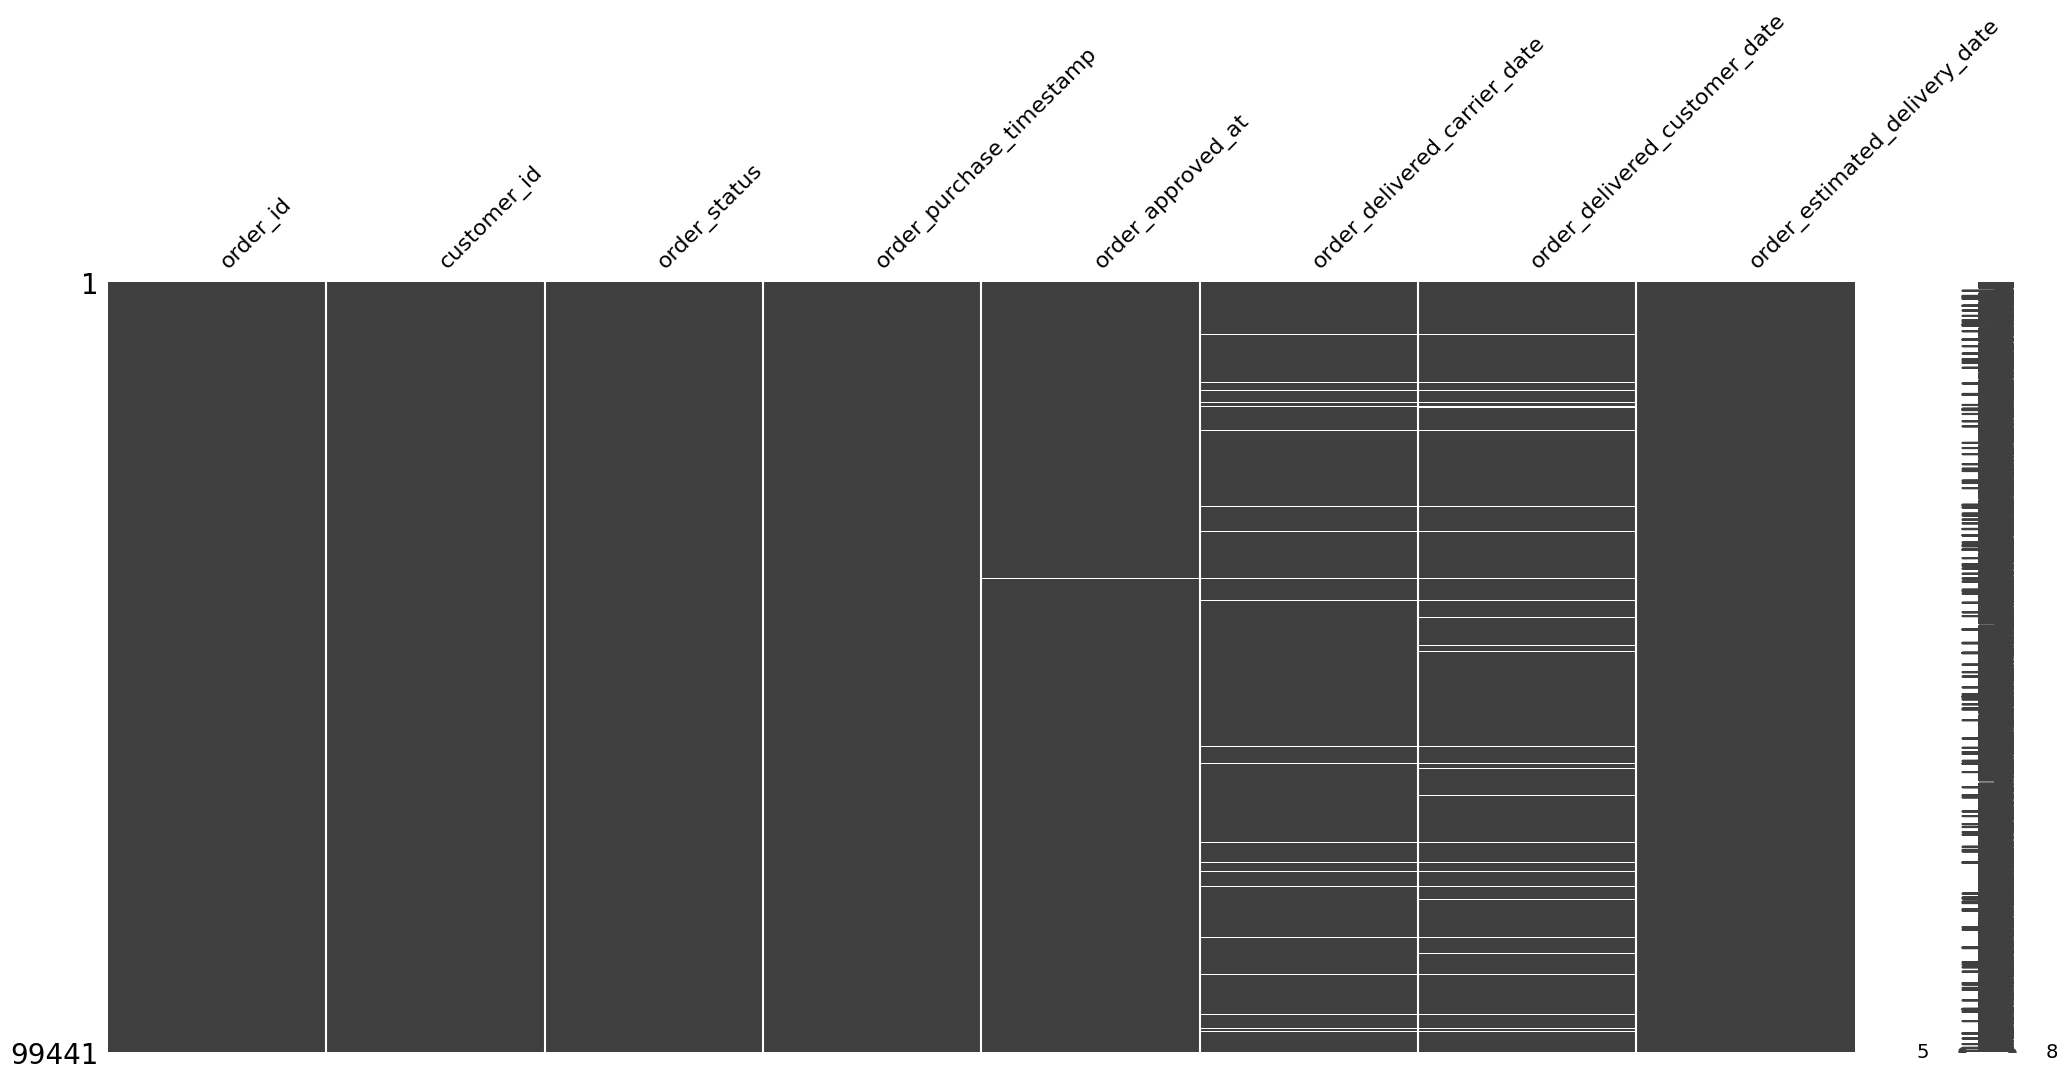

In [13]:
msno.matrix(df_orders)

#### Order items

<Axes: >

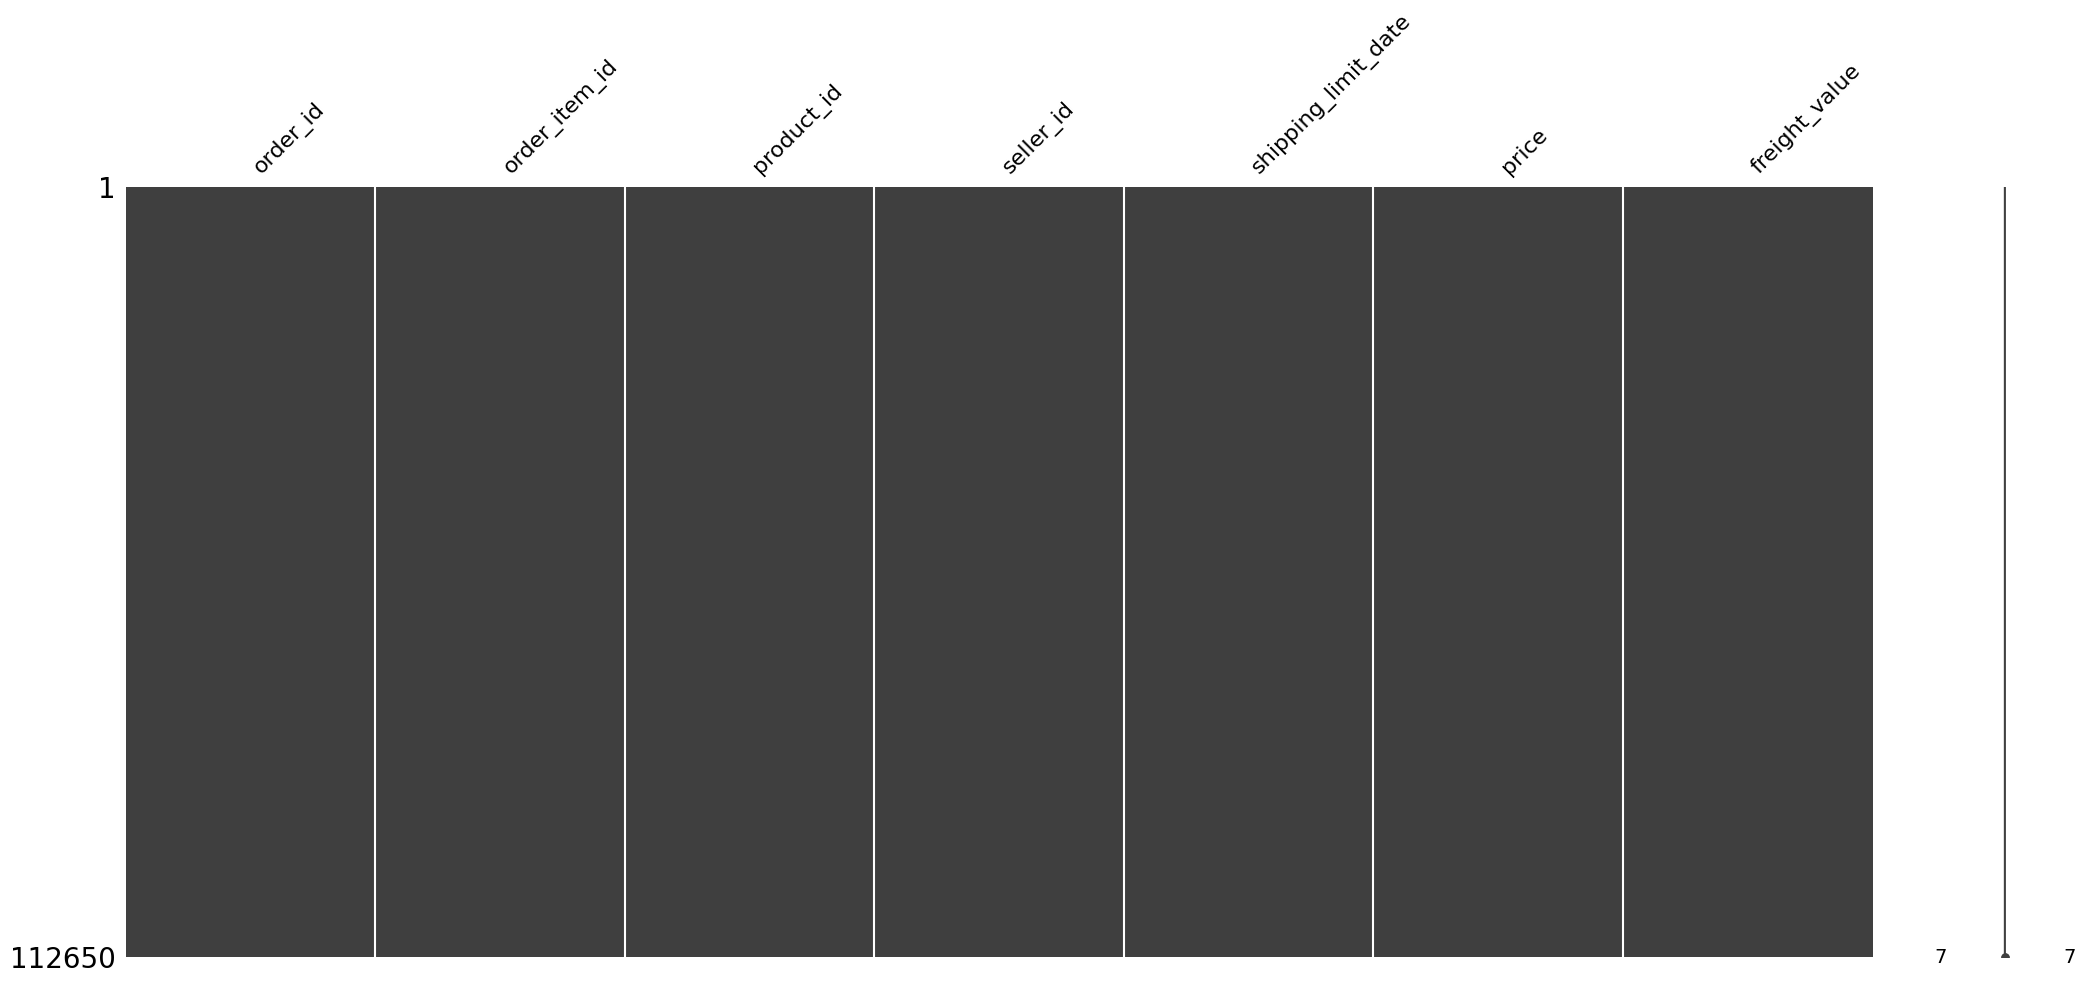

In [14]:
msno.matrix(df_order_items)

#### Products

Podemos ver la distribución de nulos

<Axes: >

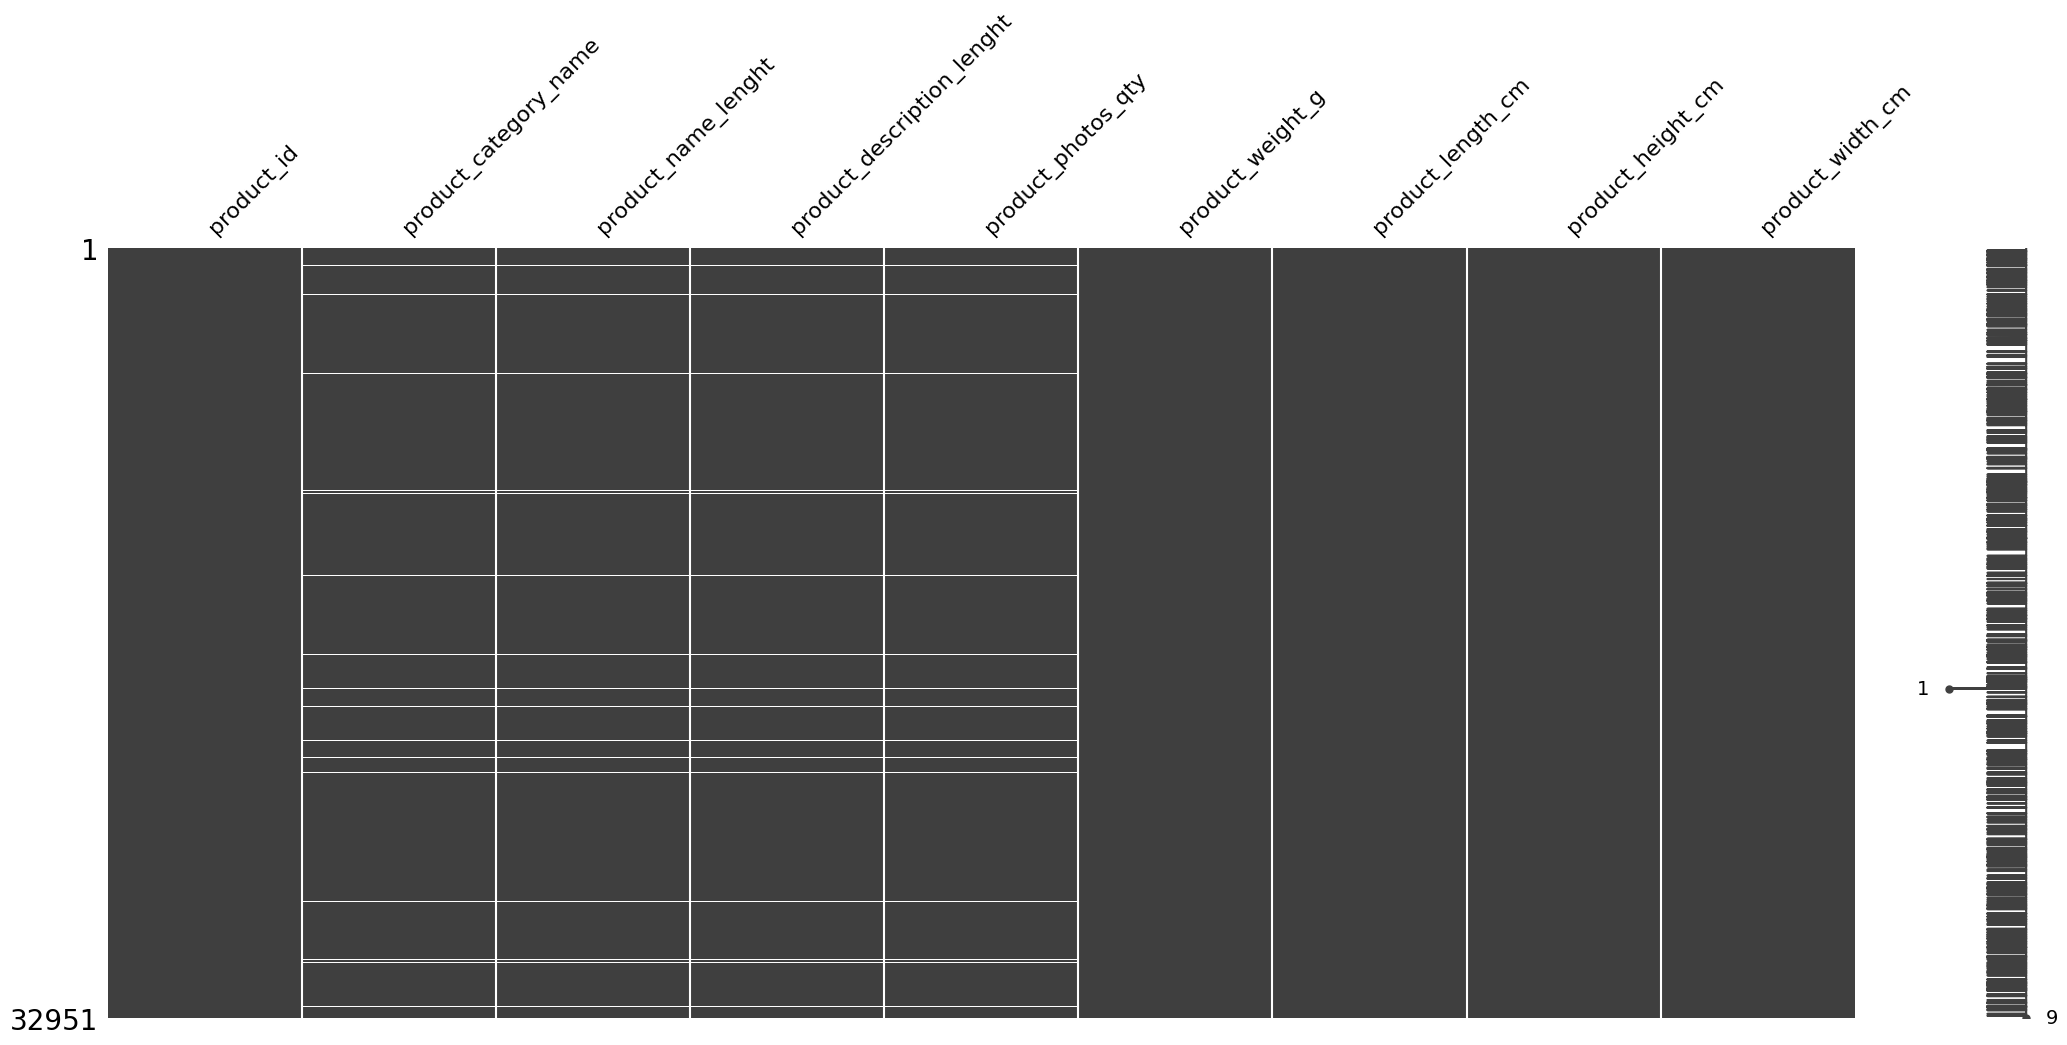

In [15]:
msno.matrix(df_products)

#### Customers

<Axes: >

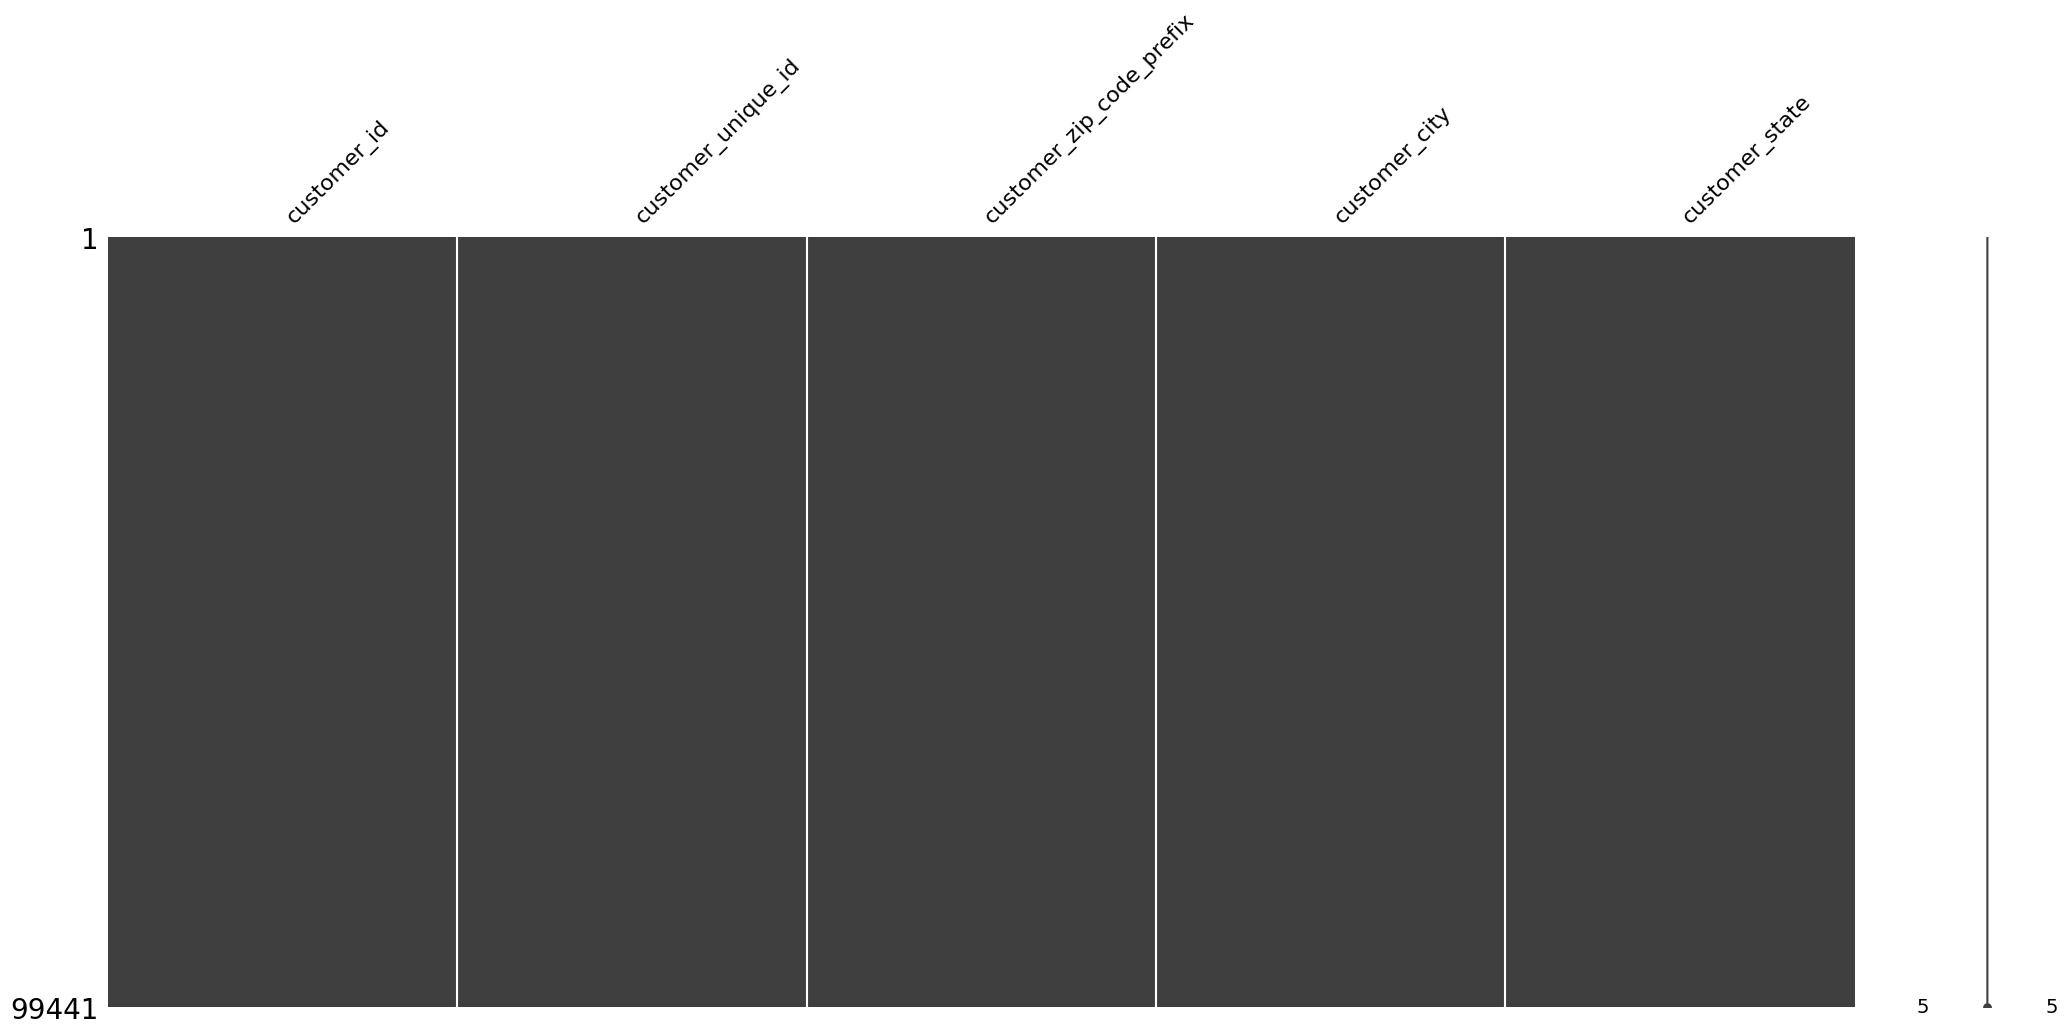

In [16]:
msno.matrix(df_customers)

#### Payments

<Axes: >

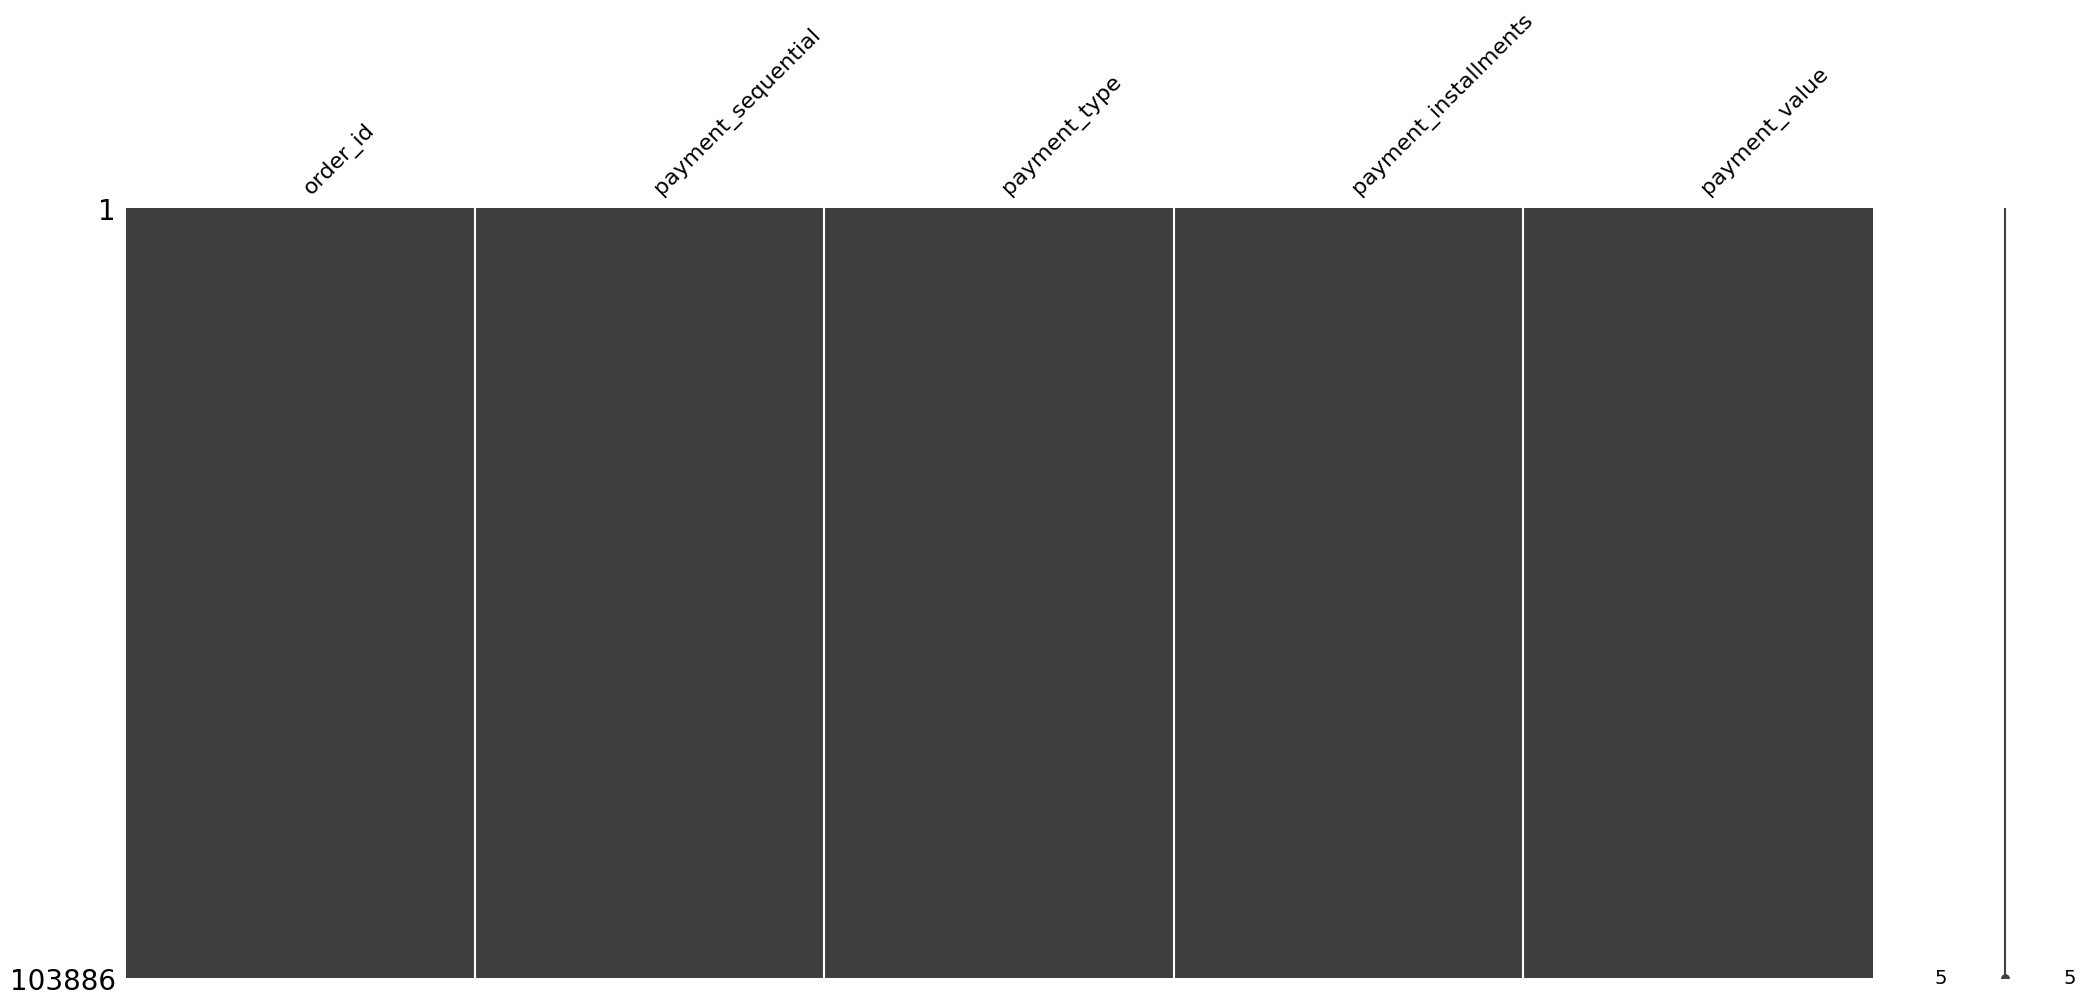

In [18]:
msno.matrix(df_payments)

### HEATMAP

Existe la posibilidad de ver si los nulos estan relacionados entre si usando heatmap, lo aplicaremos para los dataframe que tienen nulos

#### Orders

Podemos ver que cuando hay nulos en la columna order_delivered_customer_date estos un 80% de la veces tambien aparecen en  order_delivered_carrier_date

<Axes: >

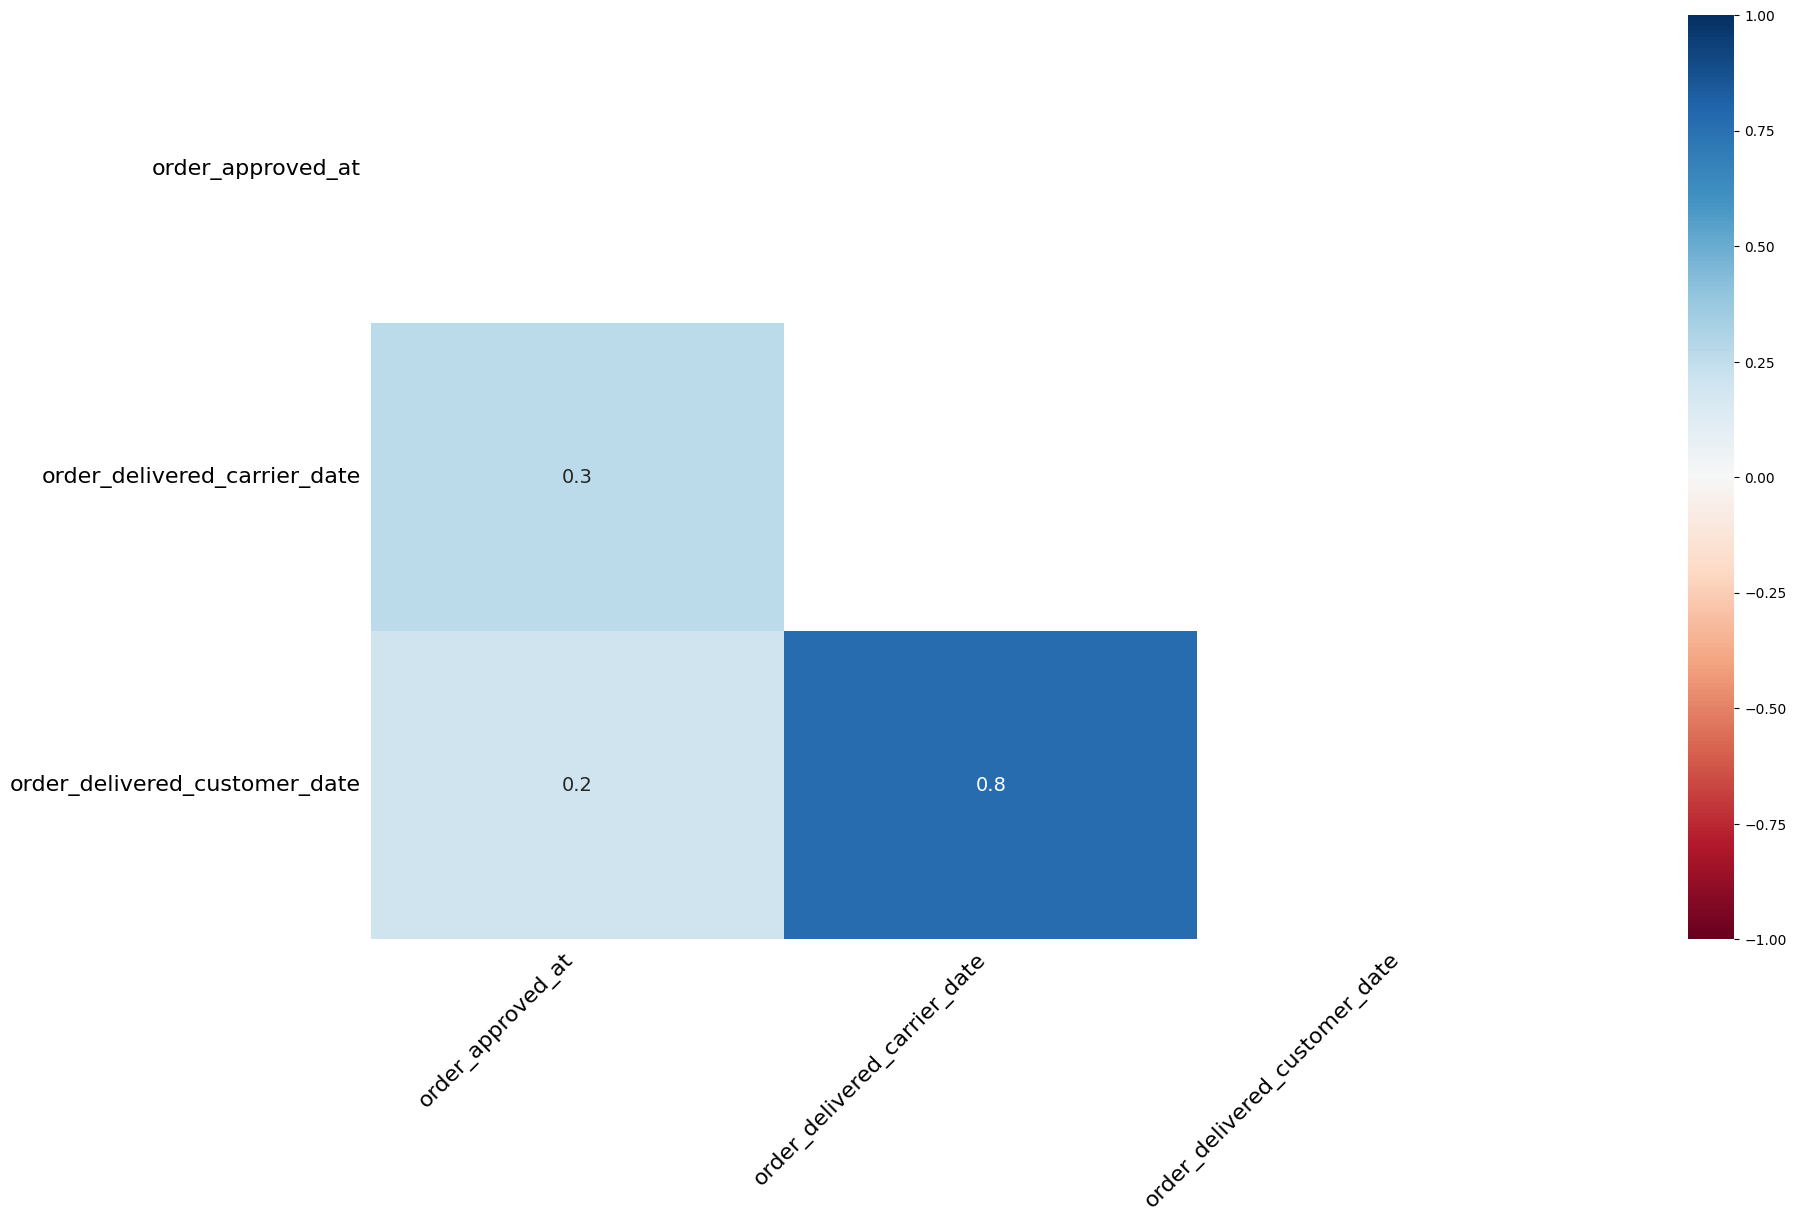

In [19]:
msno.heatmap(df_orders)

#### Products

Vemos que hay nulos en 2 grupos que aparecen en 3 columnas de forma simultanea, es decir, si falta un valor los otros 2 tambien van a ser nulos. Seguramente esto se deba a algun error en la carga de información en el catálogo.

<Axes: >

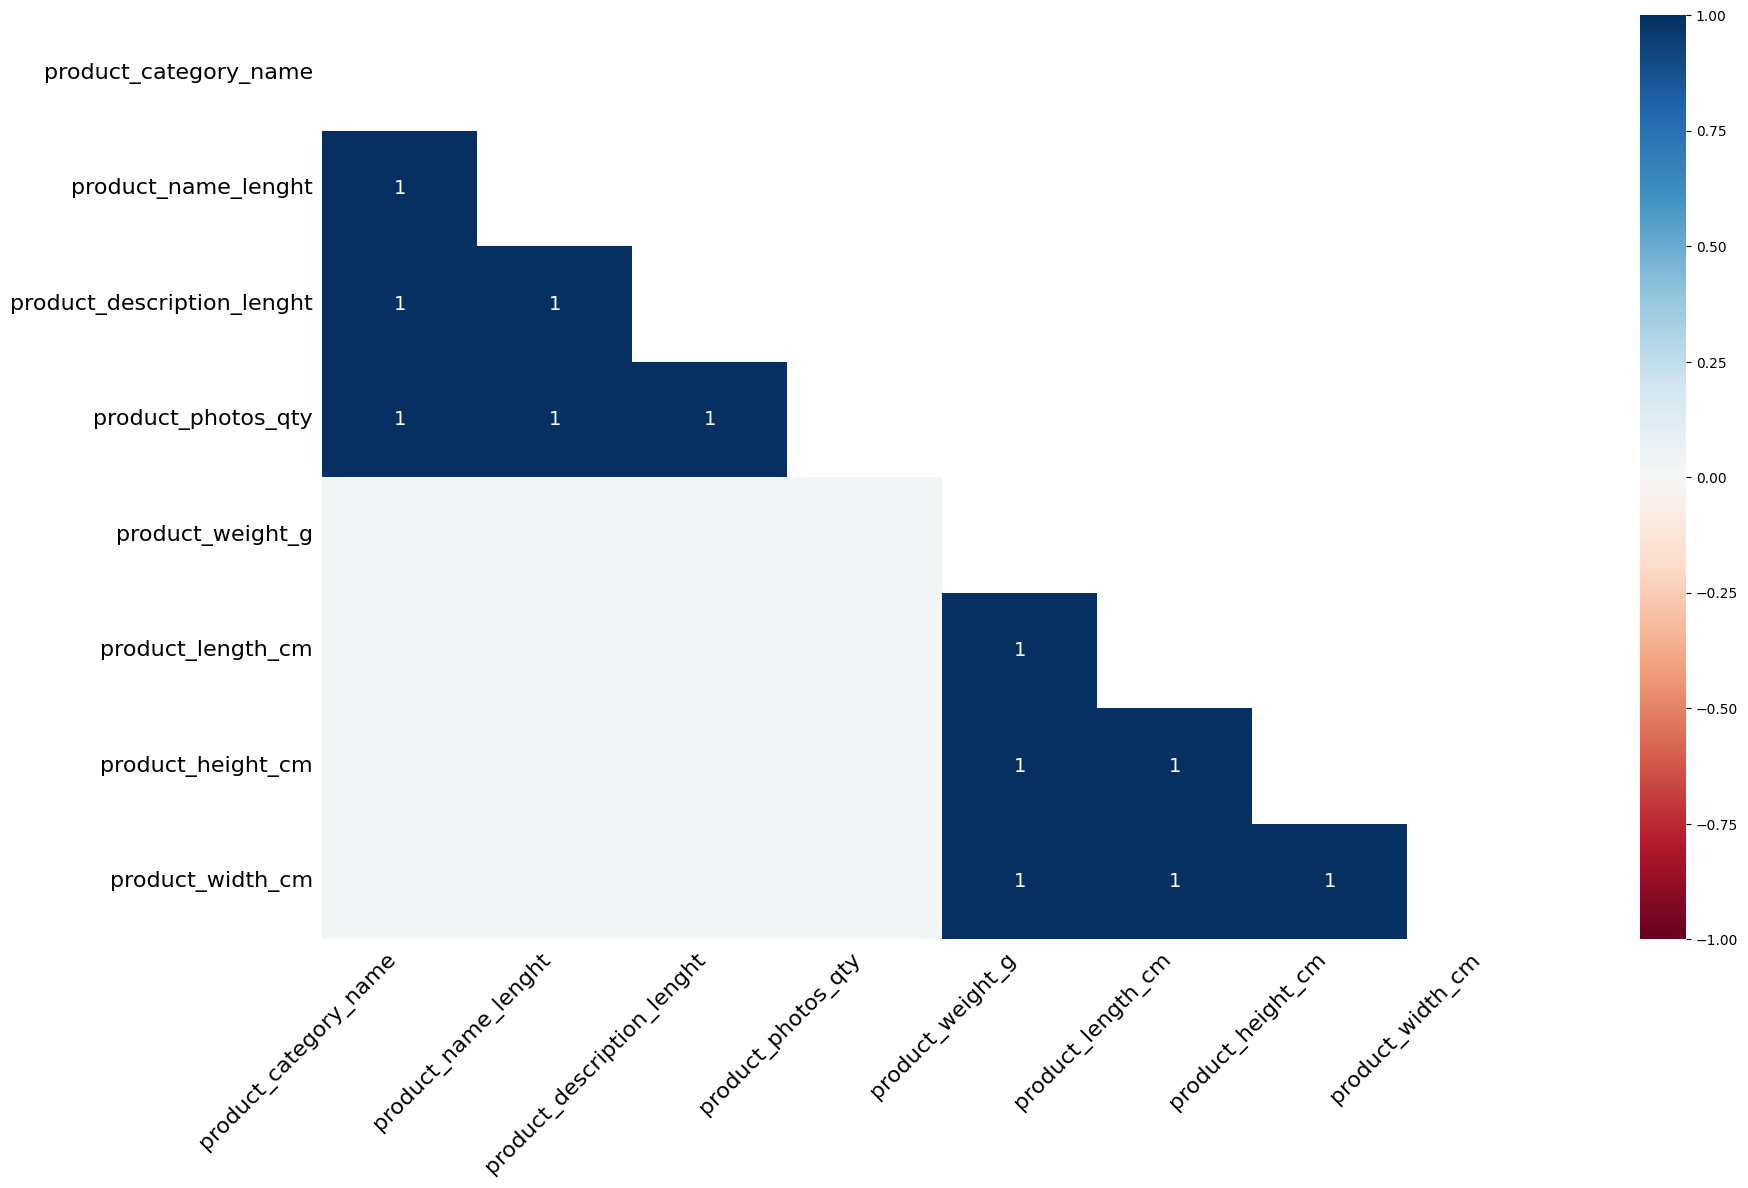

In [20]:
msno.heatmap(df_products)

## LIMPIEZA DATOS

Siempre que se va a graficar es muy importante tener los datos limpios y listos. Ya que sino puede generar problemas.

In [34]:
#Definimos nuestra función transformarFechas
def transformarFechas(df, columnas_fechas): #Los parametros son el dataframe y la lista con las columnas a transformar
    df[columnas_fechas] = df[columnas_fechas].apply(pd.to_datetime) #Transforma las columnas de columnas_fechas a datetime
    return df

In [35]:
#Definimos nuestra función transformarString
def transformarString(df, columnas_string): #Los parametros son el dataframe y la lista con las columnas a transformar
    for columna in columnas_string: #Transforma las columnas en columnas_string a string
        df[columna] = df[columna].astype("string")
    return df

In [36]:
#Definimos nuestra función convertirMayusculas
def convertirMayusculas(df, columna): #Los parametros son el dataframe y la lista con las columna a transformar
    df[columna] = df[columna].str.upper() # Convertir todos los valores de la columna a mayusculas
    return df

In [37]:
#Definimos nuestra funcion convertirMinusculas
def convertirMinusculas(df, columna): #Los parametros son el dataframe y la lista con las columna a transformar
    df[columna] = df[columna].str.lower() # Convertir todos los valores de la columna a minúsculas
    return df

In [38]:
# Porcentaje de nulos en cada columna
null_percentages_orders = (df_orders.isnull().sum() / len(df_orders)) * 100

#Veamos cual es el % de nulos
print(null_percentages_orders)


order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.160899
order_delivered_carrier_date     1.793023
order_delivered_customer_date    2.981668
order_estimated_delivery_date    0.000000
dtype: float64


In [39]:
# Filtramos las columnas con menos del 10% de valores nulos
columns_to_keep_orders = null_percentages_orders[null_percentages_orders <= 10].index

# Eliminamos las filas con nulos solo en las columnas seleccionadas
df_orders.dropna(subset=columns_to_keep_orders, inplace=True)

#Chequeo cantidad de null
df_orders.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [40]:
# Lista de columnas que contienen fechas
columnas_fechas_orders = ['order_purchase_timestamp', 'order_approved_at',
                          'order_delivered_carrier_date', 'order_delivered_customer_date',
                          'order_estimated_delivery_date']

#Aplicamos nuestra funcion conversora de fechas
df_orders = transformarFechas(df_orders, columnas_fechas_orders)

# Lista de columnas a transfomar en string
columnas_string_orders = ["order_id","customer_id","order_status"]

#Aplicamos nuestra funcion conversora de string
df_orders = transformarString(df_orders, columnas_string_orders)

#Revisamos que los tipos de datos sean correctos
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  string        
 1   customer_id                    96461 non-null  string        
 2   order_status                   96461 non-null  string        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), string(3)
memory usage: 6.6 MB


In [41]:
#Aplicamos la conversion a minusculas
df_orders = convertirMinusculas(df_orders, "order_status")

In [42]:
# Lista de columnas que contienen fechas
columnas_fechas_order_items = ['shipping_limit_date']

#Aplicamos nuestra funcion conversora de fechas
df_order_items = transformarFechas(df_order_items, columnas_fechas_order_items)

In [43]:
# Lista de columnas a transfomar en string
columnas_string_order_items = ["order_id","order_item_id","product_id","seller_id"]

#Aplicamos nuestra funcion conversora de string
df_order_items = transformarString(df_order_items, columnas_string_order_items)

In [44]:
# Porcentaje de nulos en cada columna
null_percentages_products = (df_products.isnull().sum() / len(df_products)) * 100

print(null_percentages_products)

product_id                    0.000000
product_category_name         1.851234
product_name_lenght           1.851234
product_description_lenght    1.851234
product_photos_qty            1.851234
product_weight_g              0.006070
product_length_cm             0.006070
product_height_cm             0.006070
product_width_cm              0.006070
dtype: float64


In [45]:
# Filtramos las columnas con menos del 10% de valores nulos
columns_to_keep_products = null_percentages_products[null_percentages_products <= 10].index

# Eliminamos las filas con nulos solo en las columnas seleccionadas
df_products.dropna(subset=columns_to_keep_products, inplace=True)

#Chequeo cantidad de null
df_products.isnull().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [47]:
# Lista de columnas a transfomar en string
columnas_string_products = ["product_id","product_category_name"]

#Aplicamos nuestra funcion conversora de string
df_products = transformarString(df_products, columnas_string_products)

#Revisamos que los tipos de datos sean correctos
df_products.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32340 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32340 non-null  string 
 1   product_category_name       32340 non-null  string 
 2   product_name_lenght         32340 non-null  float64
 3   product_description_lenght  32340 non-null  float64
 4   product_photos_qty          32340 non-null  float64
 5   product_weight_g            32340 non-null  float64
 6   product_length_cm           32340 non-null  float64
 7   product_height_cm           32340 non-null  float64
 8   product_width_cm            32340 non-null  float64
dtypes: float64(7), string(2)
memory usage: 2.5 MB


In [48]:
#Aplicamos la conversion a minusculas
df_products = convertirMinusculas(df_products, "product_category_name")

In [49]:
# Lista de columnas a transfomar en string
columnas_string_customers = ["customer_id","customer_unique_id","customer_zip_code_prefix","customer_city","customer_state"]

#Aplicamos nuestra funcion conversora de string
df_customers = transformarString(df_customers, columnas_string_customers)

In [50]:
#Revisamos que los tipos de datos sean correctos
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  string
 1   customer_unique_id        99441 non-null  string
 2   customer_zip_code_prefix  99441 non-null  string
 3   customer_city             99441 non-null  string
 4   customer_state            99441 non-null  string
dtypes: string(5)
memory usage: 3.8 MB


In [51]:
#Aplicamos la conversion a minusculas
df_customers = convertirMinusculas(df_customers, "customer_city")

In [52]:
#Aplicamos la conversion a mayusculas
df_customers = convertirMayusculas(df_customers, "customer_state")

In [53]:
# Lista de columnas a transfomar en string
columnas_string_order_payments = ["order_id","payment_type"]

#Aplicamos nuestra funcion conversora de string
df_order_payments = transformarString(df_payments, columnas_string_order_payments)

In [54]:
#Aplicamos la conversion a minusculas
df_order_payments = convertirMinusculas(df_payments, "payment_type")

## MATPLOTLIB

Matplotlib es una libreria muy popular para realizar gráficos en python. Devido a que cuenta con una gran personalización en estos (lo cual aumenta un poco su dificultad de uso).

Permitiendo hacer muchos gráficos los cuales pueden ser utilizados en situaciones muy diferentes.

### Histrograma

Se puede hacer un histograma con el precio de cada producto

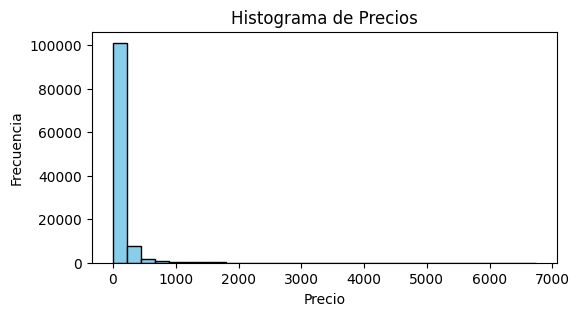

In [55]:
plt.figure(figsize=(6, 3)) #Tamaño
plt.hist(df_order_items['price'], bins=30, color='skyblue', edgecolor='black') #Info y configuración
plt.title('Histograma de Precios') #Titulo
plt.xlabel('Precio') #Nombre eje x
plt.ylabel('Frecuencia') #Nombre eje y
plt.show()

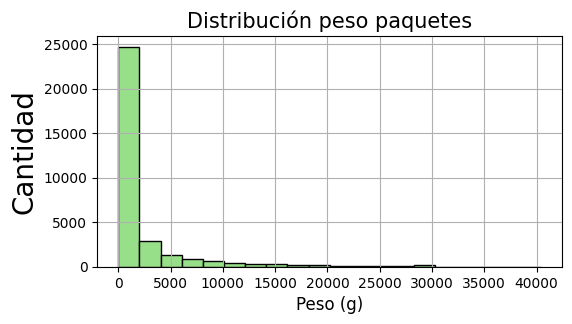

In [66]:
plt.figure(figsize=(6, 3)) #Tamaño

plt.hist(df_products['product_weight_g'].sort_values(ascending=False), bins=20, color=plt.cm.tab20.colors[5], edgecolor='black') #Info y configuración
plt.title('Distribución peso paquetes',fontsize=15) #Titulo con fuente
plt.xlabel('Peso (g)',fontsize=12) #Nombre eje x con fuente
plt.ylabel('Cantidad',fontsize=12) #Nombre eje y con fuente
plt.grid(True) #Activa la grilla de fondo
plt.show()


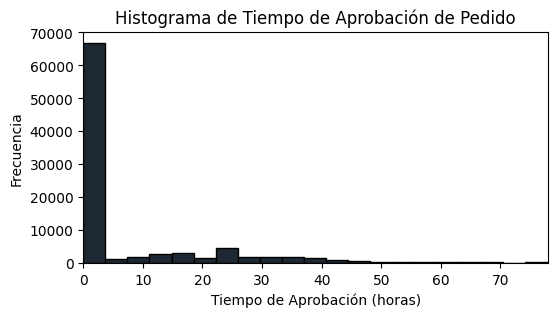

In [79]:
#Preparación columnas
df_orders['order_approved_at'] = pd.to_datetime(df_orders['order_approved_at'])
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])
df_orders['approval_time'] = (df_orders['order_approved_at'] - df_orders['order_purchase_timestamp']).dt.total_seconds() / 3600 #Segundos en hora

plt.figure(figsize=(6, 3))  # Tamaño

plt.hist(df_orders['approval_time'].dropna(), bins=200, color='#1e2832', edgecolor='black')
plt.title('Histograma de Tiempo de Aprobación de Pedido')
plt.xlabel('Tiempo de Aprobación (horas)')
plt.ylabel('Frecuencia')


plt.xlim(0, 78) #Limito el gráfico a 78hs maximo

plt.show()

### Barras

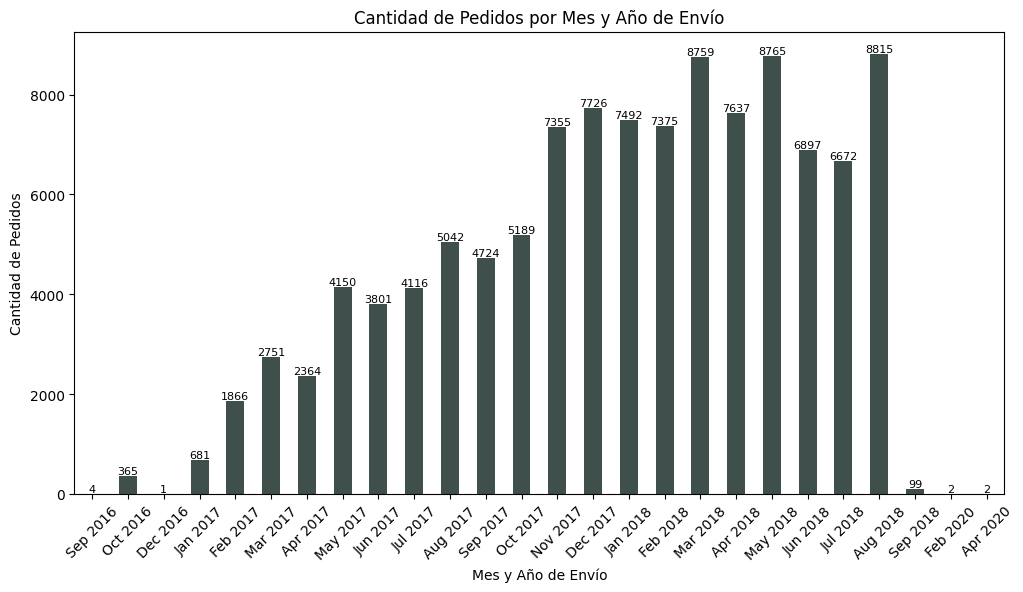

In [80]:
df_order_items['shipping_limit_date'] = pd.to_datetime(df_order_items['shipping_limit_date'])

order_counts_by_month_year = df_order_items['shipping_limit_date'].dt.to_period('M').value_counts().sort_index()

plt.figure(figsize=(12, 6))
order_counts_by_month_year.plot(kind='bar', color='#3f4f4c')
plt.title('Cantidad de Pedidos por Mes y Año de Envío')
plt.xlabel('Mes y Año de Envío')
plt.ylabel('Cantidad de Pedidos')

month_year_labels = [d.strftime('%b %Y') for d in order_counts_by_month_year.index.to_timestamp()]

plt.xticks(range(len(month_year_labels)), month_year_labels, rotation=45)

for i, v in enumerate(order_counts_by_month_year):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=8)

plt.show()

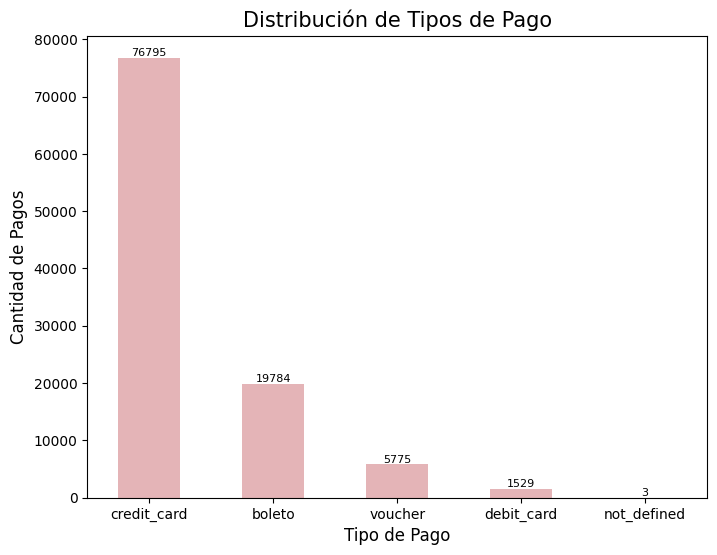

In [98]:
plt.figure(figsize=(8, 6))

payment_type_sorted = df_payments['payment_type'].value_counts()
payment_type_sorted.plot(kind='bar', color='#e4b4b7')
plt.title('Distribución de Tipos de Pago',fontsize=15)
plt.xlabel('Tipo de Pago',fontsize=12)
plt.ylabel('Cantidad de Pagos',fontsize=12)

plt.xticks(rotation=0)

for i, v in enumerate(payment_type_sorted):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=8)

plt.show()


### Columnas

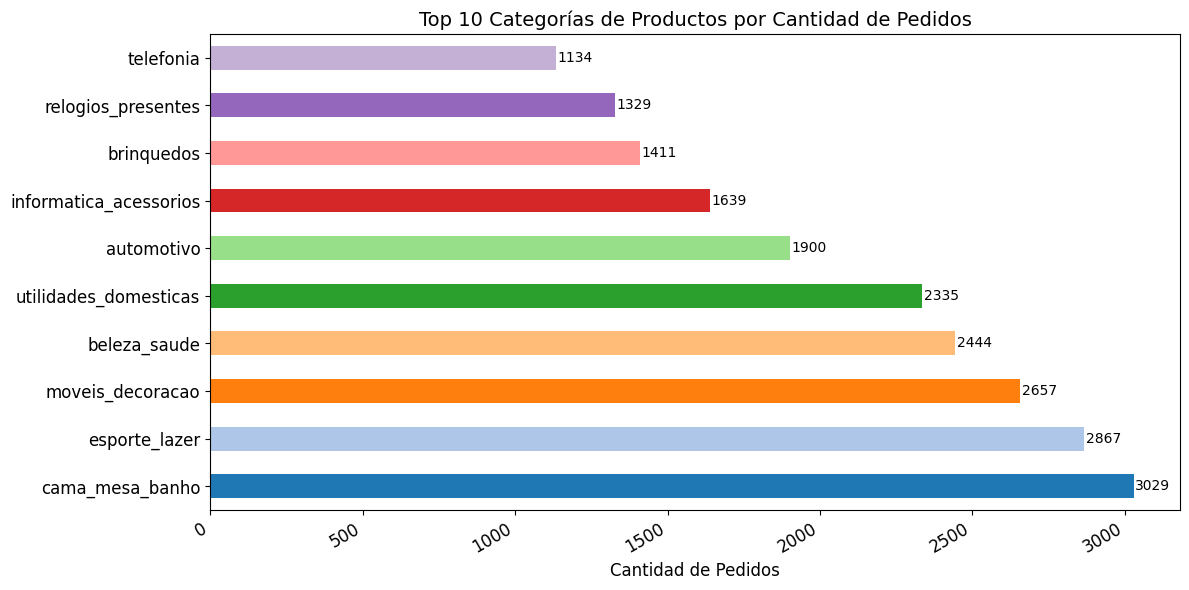

In [91]:
top_10_categories = df_products['product_category_name'].value_counts().head(10)

plt.figure(figsize=(12, 6))

top_10_categories.plot(kind='barh', color=plt.cm.tab20.colors)
plt.title('Top 10 Categorías de Productos por Cantidad de Pedidos',fontsize=14)
plt.xlabel('Cantidad de Pedidos',fontsize=12)
plt.ylabel('',fontsize=12)
plt.xticks(rotation=30, ha='right',fontsize=12)
plt.yticks(fontsize=12)

for i, val in enumerate(top_10_categories):
    plt.text(val + 5, i, str(val), va='center', ha='left', fontsize=10)

plt.tight_layout()
plt.show()

### Dispersion

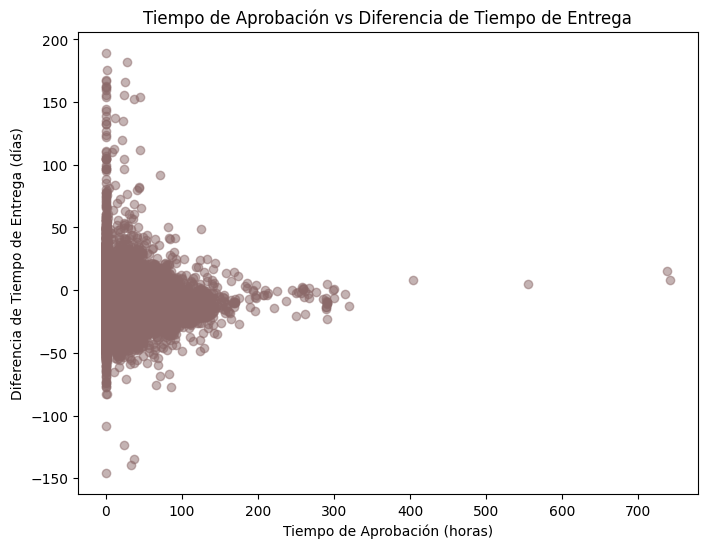

In [86]:
#Preparación columnas
df_orders['order_approved_at'] = pd.to_datetime(df_orders['order_approved_at'])
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])
df_orders['approval_time'] = (df_orders['order_approved_at'] - df_orders['order_purchase_timestamp']).dt.total_seconds() / 3600  # En horas

df_orders['order_delivered_customer_date'] = pd.to_datetime(df_orders['order_delivered_customer_date'])
df_orders['order_estimated_delivery_date'] = pd.to_datetime(df_orders['order_estimated_delivery_date'])
df_orders['delivery_time_difference'] = (df_orders['order_delivered_customer_date'] - df_orders['order_estimated_delivery_date']).dt.total_seconds() / 86400  # En días


plt.figure(figsize=(8, 6))
plt.scatter(df_orders['approval_time'], df_orders['delivery_time_difference'], color='#8b6969', alpha=0.5)
plt.title('Tiempo de Aprobación vs Diferencia de Tiempo de Entrega')
plt.xlabel('Tiempo de Aprobación (horas)')
plt.ylabel('Diferencia de Tiempo de Entrega (días)')
plt.show()


### Caja

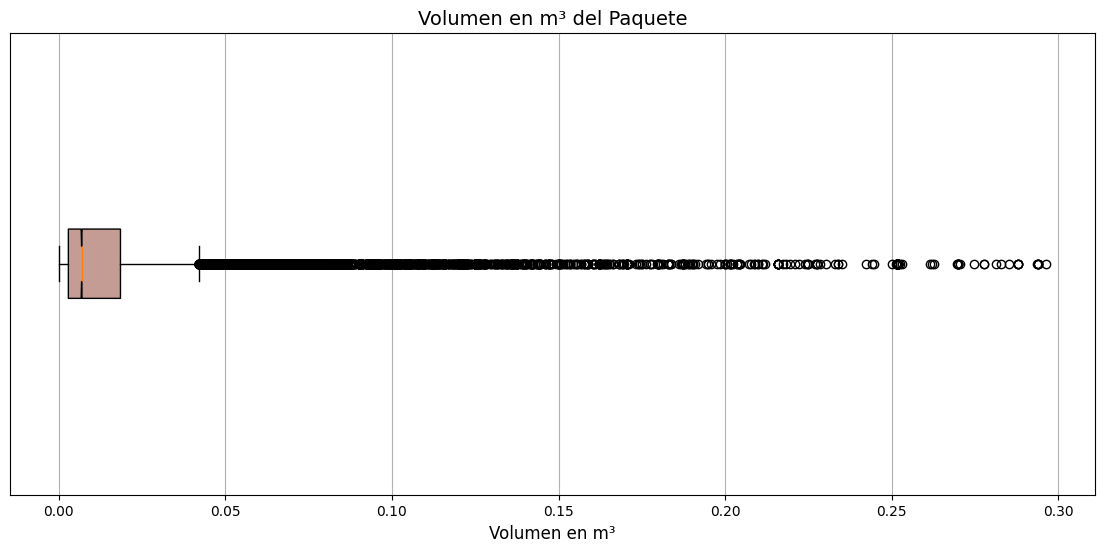

In [116]:
df_products['volumen_m3'] = (df_products['product_length_cm'] / 100) * (df_products['product_height_cm'] / 100) * (df_products['product_width_cm'] / 100)

plt.figure(figsize=(14, 6))

bplot = plt.boxplot(df_products['volumen_m3'], vert=False, patch_artist=True, notch=True)

box_color = plt.cm.tab20.colors[11]
for patch in bplot['boxes']:
    patch.set_facecolor(box_color)

plt.title('Volumen en m³ del Paquete', fontsize=14)
plt.xlabel('Volumen en m³', fontsize=12)
plt.yticks([])

plt.grid(True)
plt.show()

### Dispersión junto a histogramas

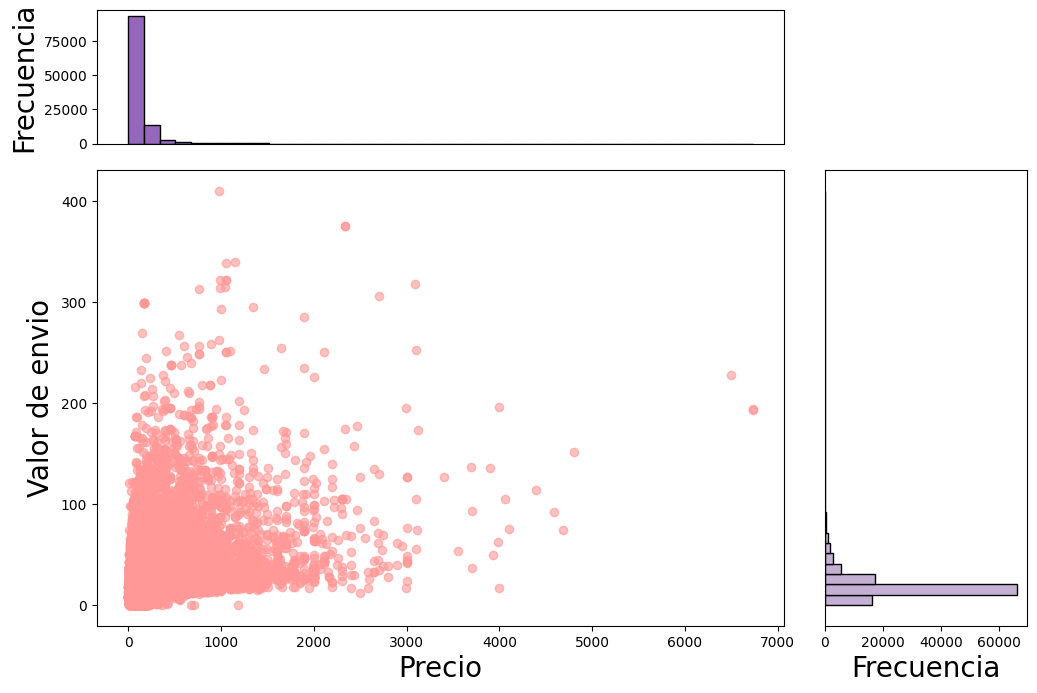

In [61]:
fig = plt.figure(figsize=(12, 8))
gs = fig.add_gridspec(4, 4)
ax = fig.add_subplot(gs[1:, :-1])
ax_histx = fig.add_subplot(gs[0, :-1], sharex=ax)
ax_histy = fig.add_subplot(gs[1:, -1], sharey=ax)


ax.scatter(df_order_items["price"], df_order_items["freight_value"], alpha=0.6,color=plt.cm.tab20.colors[7])

ax.set_xlabel("Precio",fontsize=20)
ax.set_ylabel("Valor de envio",fontsize=20)

ax_histx.hist(df_order_items["price"], bins=40, edgecolor='black', orientation='vertical',color=plt.cm.tab20.colors[8])
ax_histy.hist(df_order_items["freight_value"], bins=40, edgecolor='black', orientation='horizontal',color=plt.cm.tab20.colors[9])
ax_histx.set_ylabel("Frecuencia",fontsize=20)
ax_histy.set_xlabel("Frecuencia",fontsize=20)


ax_histx.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
ax_histy.tick_params(axis='y', which='both', left=False, labelleft=False)

plt.show()

## MERGE DATAFRAMES

Para no trabajar con los mismo datos, usando merge creamos nuevos dataframes

In [117]:
df_merge_orders_payments = pd.merge(df_orders, df_order_payments, how = "inner", on= "order_id")
df_merge_orders_payments.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,approval_time,delivery_time_difference,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0.178333,-7.107488,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0.178333,-7.107488,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0.178333,-7.107488,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,30.713889,-5.355729,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0.276111,-17.245498,1,credit_card,3,179.12


In [127]:
df_merge_orders_customers = pd.merge(df_orders, df_customers, how = "inner", on= "customer_id")
df_merge_orders_customers.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,approval_time,delivery_time_difference,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0.178333,-7.107488,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,30.713889,-5.355729,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0.276111,-17.245498,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,0.298056,-12.980069,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.030556,-9.238171,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [119]:
df_merge_order_items_products = pd.merge(df_order_items, df_products, how = "inner", on= "product_id")
df_merge_order_items_products.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,volumen_m3
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,0.003528
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,0.060000
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,0.014157
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,0.002400
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,0.042000


## SEABORN

Seaborn es una libreria que permite realizar graficos de forma sencilla, muy recomendada para aquellos que buscan gráficar de forma rápida si tener que configurar muchos parametros

### Columnas

<ipython-input-120-eff7d80698a1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_merge_orders_payments, x='payment_type', palette='Set2')


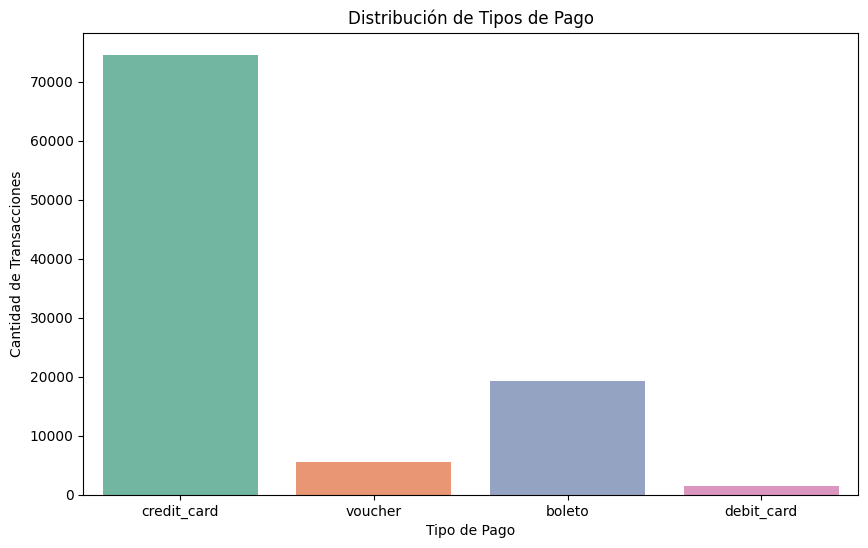

In [120]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_merge_orders_payments, x='payment_type', palette='Set2')
plt.title('Distribución de Tipos de Pago')
plt.xlabel('Tipo de Pago')
plt.ylabel('Cantidad de Transacciones')
plt.show()

<ipython-input-131-48a8fb8e3a7e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_merge_orders_customers, x='customer_state', palette='Set3')


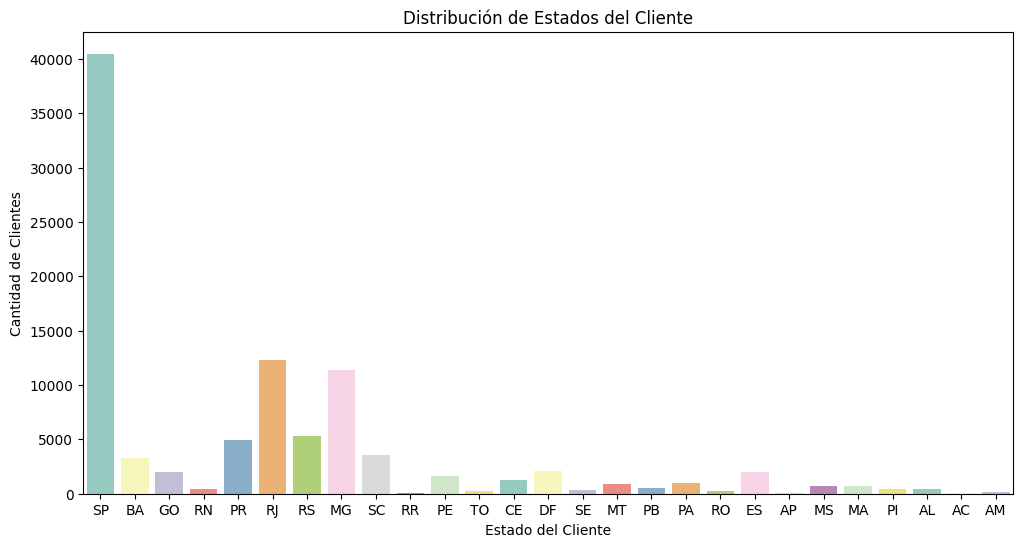

In [131]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_merge_orders_customers, x='customer_state', palette='Set3')
plt.title('Distribución de Estados del Cliente')
plt.xlabel('Estado del Cliente')
plt.ylabel('Cantidad de Clientes')
plt.show()

<ipython-input-132-dd8b7e2b539c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_merge_orders_customers, x='customer_zip_code_prefix', palette='Set2', order=df_merge_orders_customers['customer_zip_code_prefix'].value_counts().index[:20])


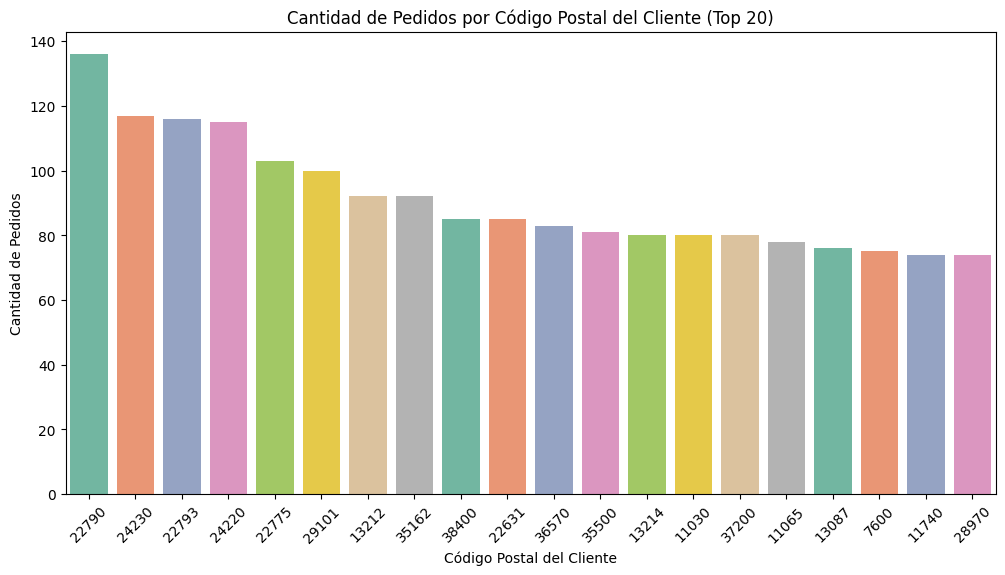

In [132]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_merge_orders_customers, x='customer_zip_code_prefix', palette='Set2', order=df_merge_orders_customers['customer_zip_code_prefix'].value_counts().index[:20])
plt.title('Cantidad de Pedidos por Código Postal del Cliente (Top 20)')
plt.xlabel('Código Postal del Cliente')
plt.ylabel('Cantidad de Pedidos')
plt.xticks(rotation=45)
plt.show()

### Columnas agrupadas

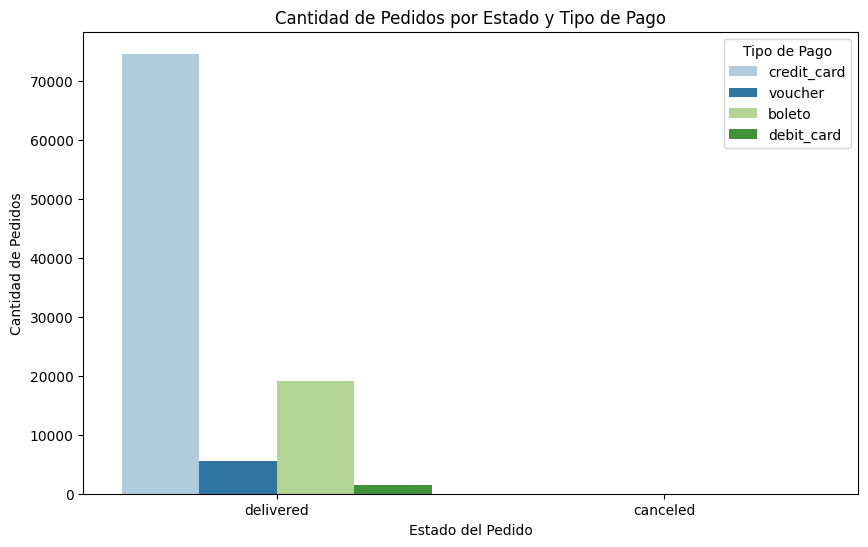

In [124]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_merge_orders_payments, x='order_status', hue='payment_type', palette='Paired')
plt.title('Cantidad de Pedidos por Estado y Tipo de Pago')
plt.xlabel('Estado del Pedido')
plt.ylabel('Cantidad de Pedidos')
plt.legend(title='Tipo de Pago')
plt.show()

### Barras

### Puntos

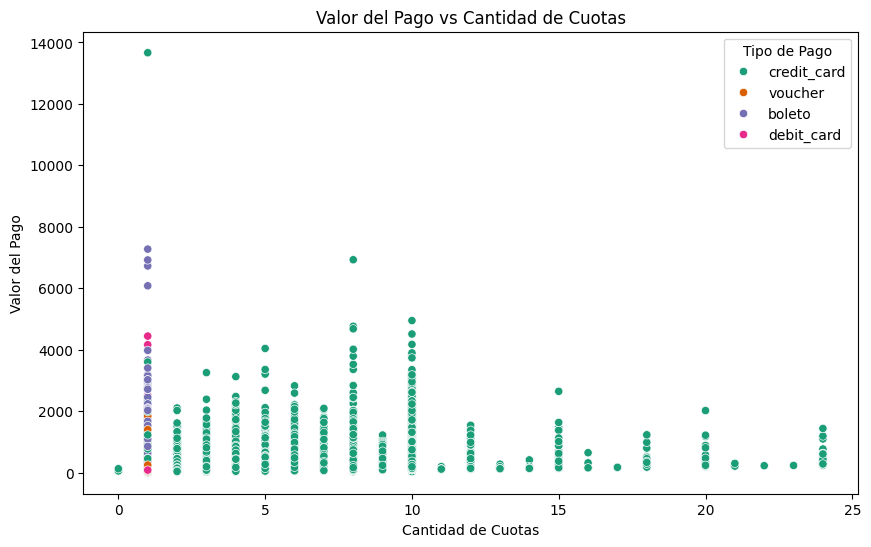

In [123]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merge_orders_payments, x='payment_installments', y='payment_value', hue='payment_type', palette='Dark2')
plt.title('Valor del Pago vs Cantidad de Cuotas')
plt.xlabel('Cantidad de Cuotas')
plt.ylabel('Valor del Pago')
plt.legend(title='Tipo de Pago')
plt.show()

### Violin

<ipython-input-141-0eeb7f6f3d9a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_top_states, x='customer_state', y='approval_time', palette='Pastel1')


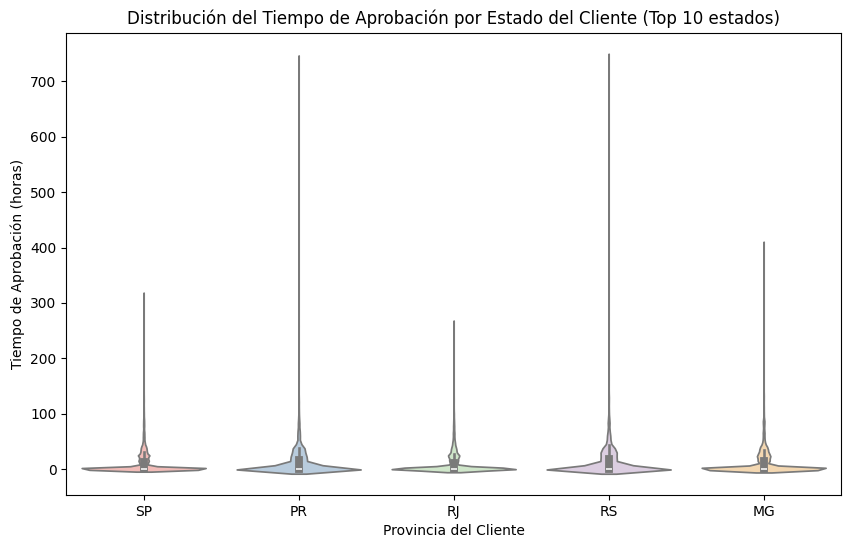

In [141]:
top_states = df_merge_orders_customers['customer_state'].value_counts().head().index
df_top_states = df_merge_orders_customers[df_merge_orders_customers['customer_state'].isin(top_states)]

plt.figure(figsize=(10, 6))
sns.violinplot(data=df_top_states, x='customer_state', y='approval_time', palette='Pastel1')
plt.title('Distribución del Tiempo de Aprobación por Estado del Cliente (Top 10 estados)')
plt.xlabel('Provincia del Cliente')
plt.ylabel('Tiempo de Aprobación (horas)')
plt.show()

<ipython-input-151-3ad2608d4159>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_top_category, y='product_category_name', x='price', palette='Pastel2')


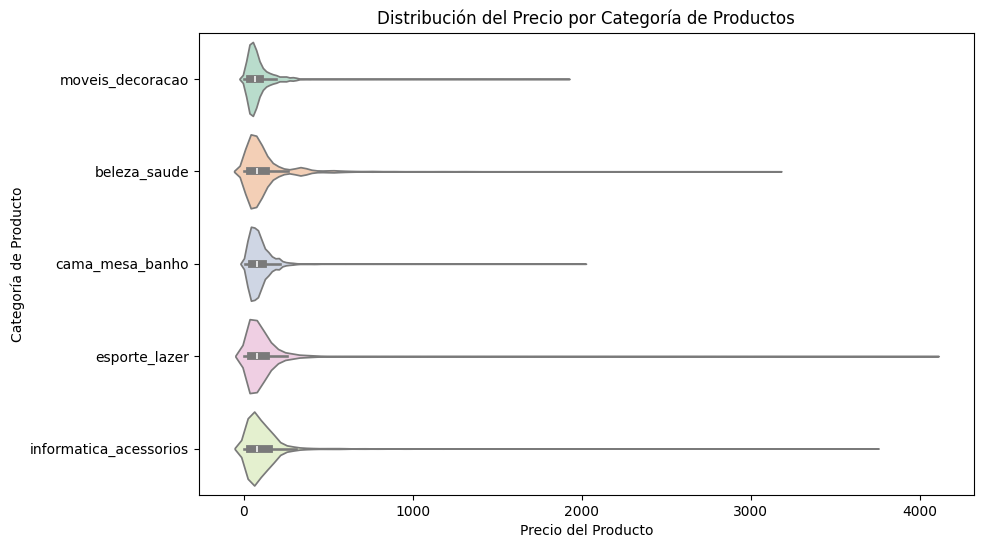

In [151]:
top_category = df_merge_order_items_products['product_category_name'].value_counts().head().index
df_top_category = df_merge_order_items_products[df_merge_order_items_products['product_category_name'].isin(top_category)]

plt.figure(figsize=(10, 6))
sns.violinplot(data=df_top_category, y='product_category_name', x='price', palette='Pastel2')
plt.title('Distribución del Precio por Categoría de Productos')
plt.xlabel('Precio del Producto')
plt.ylabel('Categoría de Producto')
plt.show()

### Dispersion

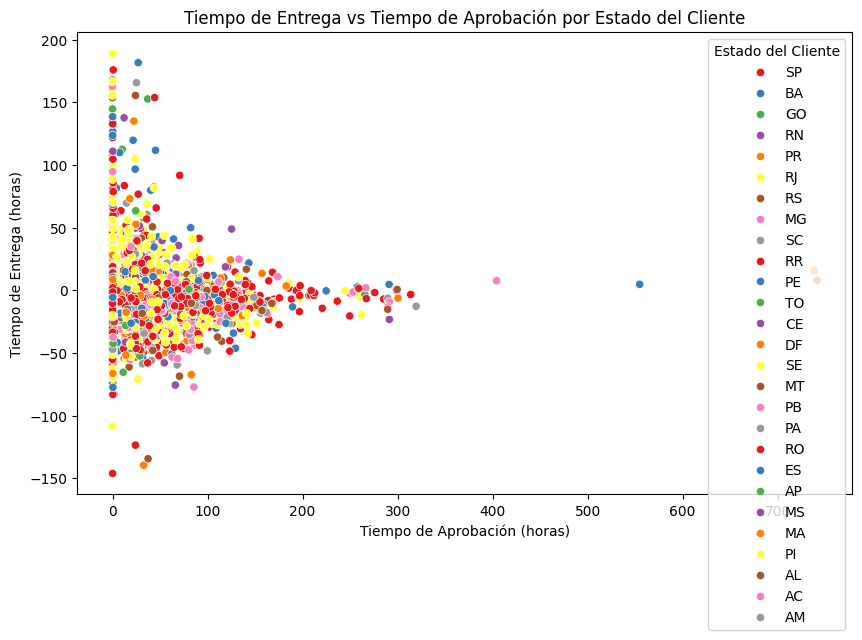

In [136]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merge_orders_customers, x='approval_time', y='delivery_time_difference', hue='customer_state', palette='Set1')
plt.title('Tiempo de Entrega vs Tiempo de Aprobación por Estado del Cliente')
plt.xlabel('Tiempo de Aprobación (horas)')
plt.ylabel('Tiempo de Entrega (horas)')
plt.legend(title='Estado del Cliente')
plt.show()